In [1]:
!pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444330 sha256=45be514ebf4fa199a383a127c55a9abf535f63e296d25704698a800c02329926
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [2]:
from scapy.all import IP, ICMP, srloop, Ether, TCP, UDP, DNS, DNSQR, hexdump, traceroute
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
ans, unans = srloop(IP(dst=["9.9.9.9", "149.112.112.112"]) / ICMP(), inter=.1, timeout=.1, count=100, verbose=False)
ans2, unans2 = srloop(IP(dst=["8.8.8.8", "8.8.4.4"]) / ICMP(), inter=.1, timeout=.1, count=100, verbose=False)
ans3, unans3 = srloop(IP(dst=["1.1.1.1", "1.0.0.1"]) / ICMP(), inter=.1, timeout=.1, count=100, verbose=False)
ans4, unans4 = srloop(IP(dst=["208.67.222.222", "208.67.220.220"]) / ICMP(), inter=.1, timeout=.1, count=100, verbose=False)


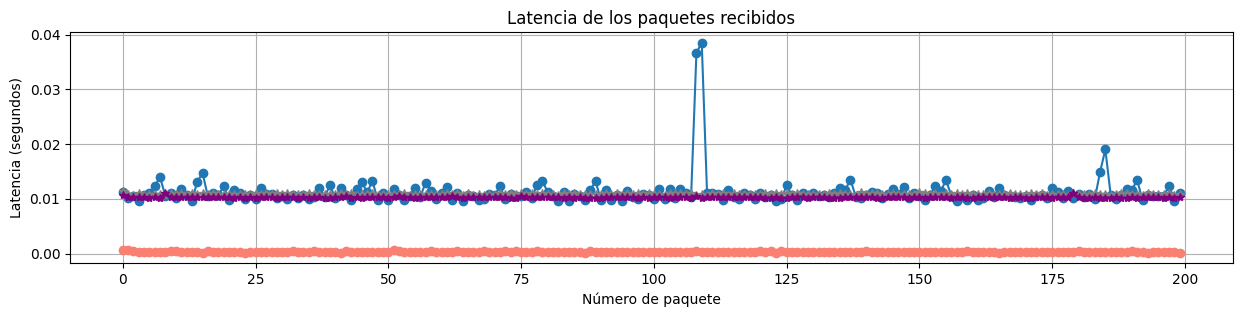

In [11]:
latency_values = [result[1].time - result[0].sent_time for result in ans]
latency_values2 = [result[1].time - result[0].sent_time for result in ans2]
latency_values3 = [result[1].time - result[0].sent_time for result in ans3]
latency_values4 = [result[1].time - result[0].sent_time for result in ans4]
# Crea un gráfico de latencia
plt.figure(figsize=(15, 3))
plt.plot(latency_values, marker='o', linestyle='-')
plt.plot(latency_values2, marker='o', linestyle='-', c='salmon')
plt.plot(latency_values3, marker='*', linestyle='-', c='gray')
plt.plot(latency_values4, marker='*', linestyle='-', c='purple')

plt.xlabel('Número de paquete')
plt.ylabel('Latencia (segundos)')
plt.title('Latencia de los paquetes recibidos')
plt.grid(True)

# Muestra el gráfico
plt.show()

In [12]:
#latency_values
data = {'Quad9': latency_values, 'Google': latency_values2, 'Cloudflare': latency_values3, 'OpenDNS': latency_values4}
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)

        Quad9    Google  Cloudflare   OpenDNS
0    0.011222  0.000677    0.011467  0.010789
1    0.010183  0.000616    0.010976  0.010255
2    0.010571  0.000393    0.010791  0.010250
3    0.009660  0.000237    0.011007  0.010288
4    0.010651  0.000331    0.010776  0.010319
..        ...       ...         ...       ...
195  0.010431  0.000274    0.010964  0.010323
196  0.010559  0.000383    0.010896  0.010243
197  0.012291  0.000226    0.011070  0.010258
198  0.009672  0.000318    0.010762  0.010242
199  0.011078  0.000161    0.010956  0.010274

[200 rows x 4 columns]


In [13]:
# Calcular el promedio de columnas
promedio_columna1 = df['Quad9'].mean()
promedio_columna2 = df['Google'].mean()
promedio_columna3 = df['Cloudflare'].mean()
promedio_columna4 = df['OpenDNS'].mean()

print(f"Promedio de Quad9: {promedio_columna1}")
print(f"Promedio de Google: {promedio_columna2}")
print(f"Promedio de Cloudflare: {promedio_columna3}")
print(f"Promedio de OpenDNS: {promedio_columna4}")

Promedio de Quad9: 0.01120575785636902
Promedio de Google: 0.0003098773956298828
Promedio de Cloudflare: 0.010927759408950806
Promedio de OpenDNS: 0.010298422574996947


In [14]:
percentil_columna1 = df['Quad9'].quantile(0.50)  # Percentil 25 para Columna1

print("\nPercentil 50 para Columna1:")
print(percentil_columna1)


Percentil 50 para Columna1:
0.010677337646484375
